<font size=10>Laboratory Assignment 3.1</font>

# Introduction
In this laboratory, we will cover the basic element of programming using a map-reduce methodology. For that purpose, we will be using Apache Spark as a reference, but bear in mind that similar frameworks exists and principles can be extrapolated.

## Some concepts and facts

- Spark is a distributed computing platform that operates on a cluster. Like MPI, we expect that nodes does NOT share a memory space but they are connected in high-speed dedicated network. Distributed filesystems that work over the network are extremely useful.

- It is considered the next generation of previous map-reduce standard Apache Hadoop. Main difference is thought to be the use of the memory instead of disk for intermediate operations, but there are many more improvements.

- It is built on Java. Despite this, it can be programmed using Java, Scala, Python or R. The complete API can only be found in JVM-based languages but the most frequent one is PySpark, since people is reluctant to use JVM-based languages in data science. Indeed, since Hadoop was only available for Java, it is likely that some Java codes of Spark are adaptations of previous Hadoop codes.

- Resilient Distributed Dataset (RDD): the basic unit that is processed in Spark. Equivalent to a numpy array but distributed.

- RDD API usually exposes the low-level operations of Apache Spark, useful for preprocessing data but useless for data analytics

- For data analysis, Dataframe and Spark SQL is used. It relies on a pandas-alike API that even accepts SQL code (which may sound crazy and useless for developers, but many *old* data scientists and statisticians are really proficient in SQL but not in Python).

## How to install Spark in colab.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install JVM v8
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz # Download latest release. Update if necessary
!tar xf spark-2.4.5-bin-hadoop2.7.tgz # Unzip
!pip install pyspark # Well, the library itself
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

     |████████████████████████████████| 217.8MB 57kB/s 
     |████████████████████████████████| 204kB 45.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=bd4ee75b56ba950d6fc1f0c8ba58adb600060626bd9dc981a0978dde43895cc7
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


## How to initialize Spark

In [ ]:
from pyspark.sql import SparkSession

APP_NAME = "CAP-lab3"
SPARK_URL = "local[*]"
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()
sc = spark.sparkContext

# First Part: RDDs

## Basic operations

### Parallelize & collect

It creates a RDD out of a list or array. Second argument indicates the number of pieces of the RDD

In [ ]:
array = sc.parallelize([1,2,3,4,5,6,7,8,9,10], 2)
array

ParallelCollectionRDD[0] at parallelize at PythonRDD.scala:195

In [ ]:
import numpy as np
randomSamples = sc.parallelize(np.random.randn(100))
randomSamples

ParallelCollectionRDD[1] at parallelize at PythonRDD.scala:195

Cool, RDDs can not be printed...

Of course, RDDs can not be printed unless they are reduced

In [ ]:
print(array.collect())
print(randomSamples.collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.508835300781957, -0.014365386075613292, -0.16233021478808718, 1.9029699655604875, -0.7645301182193324, -0.9820061478411117, -0.6534140887506724, -2.2733816178350668, 1.7928671446016875, 0.6518232476300139, 0.361889416279051, 0.10665134675636401, -0.9982591113189845, -1.2167815641355855, -0.9883621339439271, 0.1734072934854251, -0.9639461145102314, 1.6759496351244938, 0.4884893215315238, 0.926088127202734, 1.0773387651511661, 1.181559044479806, -1.6573353458283662, 0.43941226191087523, -0.5716139310589456, -0.6435358907297053, -1.1541087519306168, 0.345867977522948, 0.6851145140304477, 1.3108797621145403, 1.0150932627469738, 1.707100492444522, 0.28392731324398823, 0.30299844048549823, 0.3007973916976573, -1.0625930895216253, 0.7121214055854956, -0.3785786515738173, 0.79756401129782, -3.209492091559187, -1.1353010920245834, 0.9402495315943259, 0.38874427360094654, -0.8061143161936812, 0.4113402989514722, -0.512886898697067, -0.6521764048367581, 1.072997

Spark uses lazy operations for everything, this means that nothing is evaluated until an action, a reduce operation normally, is performed. The basic reduce operation is collect, which returns the whole RDD (i.e. no reduction is performed).

### Other ways of loading data

In [ ]:
import requests

request = requests.get("https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt")
with open("elquijote.txt", "wb") as f:
  f.write(request.content) 

In [ ]:
quijote = sc.textFile("elquijote.txt")
quijote.take(10)

['DON QUIJOTE DE LA MANCHA',
 'Miguel de Cervantes Saavedra',
 '',
 'PRIMERA PARTE',
 'CAPÍTULO 1: Que trata de la condición y ejercicio del famoso hidalgo D. Quijote de la Mancha',
 'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de 

Here, you can see both a method to load a text file line per line and a another reduction operation.

In [ ]:
quijote.take?

### Transformations

Let's review all the transformation that can be performed to data.

In [ ]:
charsPerLine = quijote.map(lambda s: len(s))
allWords = quijote.flatMap(lambda s: s.split())
allWordsNoArticles = allWords.filter(lambda a: a.lower() not in ["el", "la"])
allWordsUnique = allWords.map(lambda s: s.lower()).distinct()
sampleWords = allWords.sample(withReplacement=True, fraction=0.2, seed=666)
weirdSampling = sampleWords.union(allWordsNoArticles.sample(False, fraction=0.3))

In [ ]:
allWordsUnique.take(10)

['don',
 'mancha',
 'saavedra',
 'primera',
 'parte',
 '1:',
 'que',
 'condición',
 'y',
 'del']

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each operation above.

Comment also on the size of the resulting RDD in terms of the size of the original RDD, e.g. if original RDD is of size $N$, then rdd.filter() is of size $K\leq N$

--------
Answer:
- map
- flatMap
- filter
- distinct
- sample
- union

----

 ### Actions

 

In [ ]:
numLines = quijote.count()
numChars = charsPerLine.reduce(lambda a,b: a+b) # also charsPerLine.sum()
sortedWordsByLength = allWordsNoArticles.takeOrdered(10, key=lambda x: -len(x))
numLines, numChars, sortedWordsByLength

(2186,
 1036211,
 ['procuremos.Levántate,',
  'extraordinariamente,',
  'estrechísimamente,',
  'convirtiéndoseles',
  'entretenimientos,',
  'inadvertidamente.',
  'cortesísimamente',
  'Agredeciéronselo',
  'Pintiquiniestra,',
  'entretenimiento,'])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the count operation using reduce as the unique option. You can use transformations. Is it possible to achieve a solution without any transformation? Does it make sense?

--------
Answer:


----

## Key-Value RDDs

In [ ]:
import re
allWords = allWords.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.lower()).split(" ")).filter(lambda a: len(a)>0)
allWords2 = sc.parallelize(requests.get("https://gist.githubusercontent.com/jsdario/9d871ed773c81bf217f57d1db2d2503f/raw/585de69b0631c805dabc6280506717943b82ba4a/el_quijote_ii.txt").iter_lines())
allWords2 = allWords2.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.decode("utf8").lower()).split(" ")).filter(lambda a: len(a)>0)

In [ ]:
allWords.take(10), allWords2.take(10)

(['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'primera'],
 ['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'segunda'])

Next, we move to more interesting operations that involve key-value RDDs. Key-value RDDs are a special kind of RDDs where each is element is a tuple (K,V) where K is the key and V the value.

In [ ]:
words = allWords.map(lambda e: (e,1))
words2 = allWords2.map(lambda e: (e,1))

words.take(10)

[('don', 1),
 ('quijote', 1),
 ('de', 1),
 ('la', 1),
 ('mancha', 1),
 ('miguel', 1),
 ('de', 1),
 ('cervantes', 1),
 ('saavedra', 1),
 ('primera', 1)]

### How to manipulate K-V RDDs

In [ ]:
frequencies = words.reduceByKey(lambda a,b: a+b)
frequencies2 = words2.reduceByKey(lambda a,b: a+b)
frequencies.takeOrdered(10, key=lambda a: -a[1])

[('que', 10705),
 ('de', 9033),
 ('y', 8668),
 ('la', 5015),
 ('a', 4815),
 ('en', 4046),
 ('el', 3857),
 ('no', 3083),
 ('se', 2382),
 ('los', 2148)]

In [ ]:
res = words.groupByKey().takeOrdered(10, key=lambda a: -len(a))
res # To see the content, res[i][1].data

[('don', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b898>),
 ('mancha', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b400>),
 ('saavedra', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b438>),
 ('primera', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b4a8>),
 ('parte', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b278>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b550>),
 ('que', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b1d0>),
 ('condición', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b2b0>),
 ('y', <pyspark.resultiterable.ResultIterable at 0x7f66cad1b7b8>),
 ('del', <pyspark.resultiterable.ResultIterable at 0x7f66cad1ba20>)]

In [ ]:
joinFreq = frequencies.join(frequencies2)
joinFreq.take(10)

[('don', (1072, 1606)),
 ('mancha', (50, 101)),
 ('saavedra', (2, 1)),
 ('primera', (39, 55)),
 ('parte', (178, 158)),
 ('1', (1, 1)),
 ('que', (10705, 10040)),
 ('condición', (33, 39)),
 ('y', (8668, 9650)),
 ('del', (1128, 1344))]

In [ ]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the frequency with groupByKey and transformations.

Which of the two following cells is more efficient?

--------
Answer:


------

In [ ]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

In [ ]:
result = joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1])))
result.takeOrdered(10, lambda v: -v[1]), result.takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

## Optimizations and final notes

### Optimizing the data movement around the cluster

One of the main issues could be that if data after an operation is not balanced, we may not be using the cluster properly. For that purpose, we have two operations


In [ ]:
result.coalesce(numPartitions=2) # Avoids the data movement, so it tries to balance inside each machine
result.repartition(numPartitions=2) # We don't care about data movement, this balance the whole thing to ensure all machines are used

MapPartitionsRDD[50] at coalesce at NativeMethodAccessorImpl.java:0

### Persistance for intermediate operations
In contrast to Hadoop, intermediate RDDs are not preserved, each time we use an action/reduction, the whole data pipeline is executed from the datasources. To avoid this:


In [ ]:
result.take(10)
allWords.cache() # allWords RDD must  stay in memory after computation, we made a checkpoint (well, it's a best effort, so must might be too strong)
result.take(10)

[('don', -0.19940253920836445),
 ('mancha', -0.33774834437086093),
 ('saavedra', 0.3333333333333333),
 ('primera', -0.1702127659574468),
 ('parte', 0.05952380952380952),
 ('1', 0.0),
 ('que', 0.03205591708845505),
 ('condición', -0.08333333333333333),
 ('y', -0.05360847254067038),
 ('del', -0.08737864077669903)]

In [ ]:
from pyspark import StorageLevel
# https://spark.apache.org/docs/2.2.0/rdd-programming-guide.html#rdd-persistence
allWords2.persist(StorageLevel.MEMORY_AND_DISK) # Now it will be preserved on disk also

PythonRDD[54] at RDD at PythonRDD.scala:53

In [ ]:
!rm -rf palabras_parte2
allWords2.saveAsTextFile("palabras_parte2")

In [ ]:
!ls palabras_parte2

part-00000  part-00001	_SUCCESS


--------


<font size=10 color=red>Assignment question</font>

Before saving with saveAsTextFile, use coalesce with different values. What's the difference in the previous ls? 

--------
Answer:

----

### Global variables

There are two kind of global variables, read-only and write-only.

In [ ]:
articles = sc.broadcast(["el", "la"])
articles.value

['el', 'la']

Broadcast variables are read-only. They help us to avoid local variables of the closures (the functions we use inside map, reduce, ...) to be transferred in every single Spark operation. In that way, they are only transferred only once.

In [ ]:
acc = sc.accumulator(0)
def incrementar(x):
  global acc
  acc += x

allWords.map(lambda l:1).foreach(incrementar)
acc

Accumulator<id=0, value=187045>

Write-only variables can be also declared and initialized, but they can not be read since reading will force a complete synchronization of the cluster.

# Second part: Spark SQL

Next, we will do a short review of the high-level API of Spark

In [ ]:
import pandas as pd

size = int(1e6)
def loadRedditToPandas(subreddit=None, size=size):
  if subreddit is not None:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?subreddit={subreddit}&sort=desc&sort_type=created_utc&size={size:d}").json()
  else:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?sort=desc&sort_type=created_utc&size={size:d}").json()
  return pd.DataFrame(redditData["data"])

In [ ]:
pdf = loadRedditToPandas()
pdf.head(10)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,crosspost_parent,crosspost_parent_list,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,no_follow,num_comments,num_crossposts,over_18,permalink,...,preview,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,parent_whitelist_status,pwls,whitelist_status,wls,link_flair_template_id,link_flair_text,link_flair_css_class,removed_by_category,author_flair_background_color,author_flair_template_id,author_flair_text_color,discussion_type,rpan_video,content_categories,author_cakeday,media_metadata,poll_data,banned_by
0,[],False,Acoal69,None,[],None,text,t2_5i010vnd,False,False,[],False,False,1588513721,t3_gcqgeo,"[{'all_awardings': [], 'allow_live_comments': ...",gfycat.com,https://www.reddit.com/r/u_Acoal69/comments/gc...,{},gcqv4j,True,False,False,False,True,False,False,,[],dark,text,False,"{'oembed': {'author_name': 'Gfycat', 'descript...","{'content': '&lt;iframe class=""embedly-embed"" ...",False,True,0,0,True,/r/u_Acoal69/comments/gcqv4j/such_pleasure/,...,"{'enabled': True, 'images': [{'id': 'p_9yZUq8J...",1588513840,1,"{'oembed': {'author_name': 'Gfycat', 'descript...","{'content': '&lt;iframe class=""embedly-embed"" ...",,True,False,False,u_Acoal69,t5_2dkbzk,0,user,qa,nsfw,78.0,140.0,such pleasure,0,[],1.0,https://gfycat.com/willingbruiseddragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Hockey_Sweater,None,[],None,text,t2_p322x,False,False,[],False,False,1588513720,NaN,NaN,globalnews.ca,https://www.reddit.com/r/UnbiasedCanada/commen...,{},gcqv4d,True,False,False,False,True,False,False,,[],dark,text,False,NaN,NaN,False,True,0,0,False,/r/UnbiasedCanada/comments/gcqv4d/some_sex_wor...,...,"{'enabled': False, 'images': [{'id': 't6mup88_...",1588513840,1,NaN,NaN,,True,False,False,UnbiasedCanada,t5_qik0e,1259,public,new,https://b.thumbs.redditmedia.com/Lx6qQtSw7ZY-O...,73.0,140.0,Some sex workers’ income has ‘completely disso...,0,[],1.0,https://globalnews.ca/news/6883831/sex-workers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,sps97grt,None,[],None,text,t2_139u4a,False,False,[],False,False,1588513719,NaN,NaN,i.redd.it,https://www.reddit.com/r/betterCallSaul/commen...,{},gcqv4b,True,False,False,True,True,False,False,,[],dark,text,False,NaN,NaN,False,True,0,0,False,/r/betterCallSaul/comments/gcqv4b/so_i_started...,...,"{'enabled': True, 'images': [{'id': 'WGdw84b2P...",1588513840,1,NaN,NaN,,True,False,False,betterCallSaul,t5_2u05j,223246,public,NaN,image,78.0,140.0,"So I started watching ""It's Always Sunny in Ph...",0,[],1.0,https://i.redd.it/ludwwha91kw41.jpg,all_ads,6.0,all_ads,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,thirdsurface,None,[],None,text,t2_l4sxh,False,False,[],False,False,1588513718,NaN,NaN,self.SouthJersey,https://www.reddit.com/r/SouthJersey/comments/...,{},gcqv4a,True,False,False,False,True,True,False,,[],dark,text,False,NaN,NaN,False,True,0,0,False,/r/SouthJersey/comments/gcqv4a/any_organizatio...,...,NaN,1588513839,1,NaN,NaN,,True,False,False,SouthJersey,t5_2s74w,10105,public,NaN,self,NaN,NaN,Any organizations in the area need hand saniti...,0,[],1.0,https://www.reddit.com/r/SouthJersey/comments/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,uixnetwork,None,[],None,text,t2_4l7uqxi4,False,False,[],False,False,1588513718,NaN,NaN,team.us

In [ ]:
pdf.selftext = pdf.selftext.apply(lambda e: str(e))

In [ ]:
attrs = ["author", "created_utc", "title", "subreddit", "selftext", "over_18"]
df = spark.createDataFrame(pdf[attrs])

## Basic operations

In [ ]:
df.show()

+------------------+-----------+--------------------+--------------------+--------------------+-------+
|            author|created_utc|               title|           subreddit|            selftext|over_18|
+------------------+-----------+--------------------+--------------------+--------------------+-------+
|           Acoal69| 1588513721|       such pleasure|           u_Acoal69|                    |   true|
|    Hockey_Sweater| 1588513720|Some sex workers’...|      UnbiasedCanada|                    |  false|
|          sps97grt| 1588513719|So I started watc...|      betterCallSaul|                    |  false|
|      thirdsurface| 1588513718|Any organizations...|         SouthJersey|                    |  false|
|        uixnetwork| 1588513718|Skip Bayless Q&am...|        u_uixnetwork|                    |  false|
|  jonathanivoridge| 1588513718|              r/pics|    coaxedintoasnafu|                    |  false|
|        Darketties| 1588513717|Casino Heist / Bo...|          H

### Filtering

In [ ]:
df.filter(~df.over_18).show()

+------------------+-----------+--------------------+--------------------+--------------------+-------+
|            author|created_utc|               title|           subreddit|            selftext|over_18|
+------------------+-----------+--------------------+--------------------+--------------------+-------+
|    Hockey_Sweater| 1588513720|Some sex workers’...|      UnbiasedCanada|                    |  false|
|          sps97grt| 1588513719|So I started watc...|      betterCallSaul|                    |  false|
|      thirdsurface| 1588513718|Any organizations...|         SouthJersey|                    |  false|
|        uixnetwork| 1588513718|Skip Bayless Q&am...|        u_uixnetwork|                    |  false|
|  jonathanivoridge| 1588513718|              r/pics|    coaxedintoasnafu|                    |  false|
|        Darketties| 1588513717|Casino Heist / Bo...|          HeistTeams|Need someone to d...|  false|
| mysterious_mosaic| 1588513717|People of Reddit,...|           

In [ ]:
df.where(~df.over_18).show()

+------------------+-----------+--------------------+--------------------+--------------------+-------+
|            author|created_utc|               title|           subreddit|            selftext|over_18|
+------------------+-----------+--------------------+--------------------+--------------------+-------+
|    Hockey_Sweater| 1588513720|Some sex workers’...|      UnbiasedCanada|                    |  false|
|          sps97grt| 1588513719|So I started watc...|      betterCallSaul|                    |  false|
|      thirdsurface| 1588513718|Any organizations...|         SouthJersey|                    |  false|
|        uixnetwork| 1588513718|Skip Bayless Q&am...|        u_uixnetwork|                    |  false|
|  jonathanivoridge| 1588513718|              r/pics|    coaxedintoasnafu|                    |  false|
|        Darketties| 1588513717|Casino Heist / Bo...|          HeistTeams|Need someone to d...|  false|
| mysterious_mosaic| 1588513717|People of Reddit,...|           

In [ ]:
df.where("not over_18").show() # SQL syntax

+------------------+-----------+--------------------+--------------------+--------------------+-------+
|            author|created_utc|               title|           subreddit|            selftext|over_18|
+------------------+-----------+--------------------+--------------------+--------------------+-------+
|    Hockey_Sweater| 1588513720|Some sex workers’...|      UnbiasedCanada|                    |  false|
|          sps97grt| 1588513719|So I started watc...|      betterCallSaul|                    |  false|
|      thirdsurface| 1588513718|Any organizations...|         SouthJersey|                    |  false|
|        uixnetwork| 1588513718|Skip Bayless Q&am...|        u_uixnetwork|                    |  false|
|  jonathanivoridge| 1588513718|              r/pics|    coaxedintoasnafu|                    |  false|
|        Darketties| 1588513717|Casino Heist / Bo...|          HeistTeams|Need someone to d...|  false|
| mysterious_mosaic| 1588513717|People of Reddit,...|           

### Operations



In [ ]:
df.select(df.created_utc * 2).show()

+-----------------+
|(created_utc * 2)|
+-----------------+
|       3177027442|
|       3177027440|
|       3177027438|
|       3177027436|
|       3177027436|
|       3177027436|
|       3177027434|
|       3177027434|
|       3177027434|
|       3177027434|
|       3177027434|
|       3177027432|
|       3177027432|
|       3177027432|
|       3177027430|
|       3177027430|
|       3177027426|
|       3177027426|
|       3177027426|
|       3177027426|
+-----------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import log
df.select(log(df.created_utc * 2)).show()

+----------------------+
|LOG((created_utc * 2))|
+----------------------+
|    21.879211829905014|
|    21.879211829275498|
|     21.87921182864598|
|     21.87921182801646|
|     21.87921182801646|
|     21.87921182801646|
|     21.87921182738694|
|     21.87921182738694|
|     21.87921182738694|
|     21.87921182738694|
|     21.87921182738694|
|     21.87921182675742|
|     21.87921182675742|
|     21.87921182675742|
|      21.8792118261279|
|      21.8792118261279|
|     21.87921182486886|
|     21.87921182486886|
|     21.87921182486886|
|     21.87921182486886|
+----------------------+
only showing top 20 rows



### Aggregations



In [ ]:
df.where("not over_18").groupby(["author", df.subreddit]).count().toPandas()

,author,subreddit,count
0,g4m3f33d,GameFeed,2
1,TwiliciousREEE,reddeadfashion,1
2,masterofmastercard,holdmyfeedingtube,1
3,DaVibes,rnb,1
4,Jack_Douniels,ClashRoyaleTrade,1
...,...,...,...
745,Mr_Max_Pusherman,runescape,1
746,shpnwrkd,DynastyCW,1
747,hjalmar111,FreezingFuckingCold,1
748,zeldaguy85,findfashion,1


### Custom functions

In [ ]:
from pyspark.sql.functions import length

df = df.withColumn("length", length(df.selftext)) # This adds a column

df.where("length > 1000").toPandas()

,author,created_utc,title,subreddit,selftext,over_18,length
0,beachxbunny,1588513712,Ethical Q: how bad is it to take props from ra...,houseplants,"I have a few babies, outside I have an aloe ve...",False,1136
1,deadly_nightshaade,1588513709,High stats in qp/classic mix playlist but havi...,CruciblePlaybook,Right now I have an overall in regular 6v6 of ...,False,1115
2,bear-rah,1588513704,"Warren Buffett dumps US airline stocks, saying...",collapse,[https://www.theguardian.com/world/2020/may/0...,False,1315
3,ijlver68,1588513701,Do you find it weird that people in their 30s+...,AskWomenOver30,So I’m 22 and I have a friend who’s 18 and I c...,False,1553
4,CradleTheDead,1588513697,[Xbox] [H] a dream [W] you to help me finish t...,RocketLeagueExchange,\n\n\n\n\n\n#Sweeper Fennec’s 3/13\n\n\n|PAINT...,False,1081
5,MarcixB,1588513693,How badly would a 5700xt be bottlenecked by pc...,pcmasterrace,So I'm waiting on the i7-10700k before I upgra...,False,1232
6,Novaxel,1588513691,How to Put an End to Procrastination,DecidingToBeBetter,Following yesterday's post about getting out o...,False,14799
7,CradleTheDead,1588513690,[Xbox] [H] a dream [W] you to help me finish t...,RocketLeagueExchange,\n\n\n\n\n\n#Sweeper Fennec’s 3/13\n\n\n|PAINT...,False,1081
8,sisterjerry83,1588513690,I'm (37F) not feeling listened to by my boyfri...,relationship_advice,Lately I have been fighting with my boyfriend ...,False,3652
9,Dil26,1588513690,[For Hire] Professional &amp; Affordable Write...,forhire,Hey!\n\nI am a SEO-focused freelance writer t...,False,2847


In [ ]:
from pyspark.sql.functions import udf

def splitWords(e):
  return e.split(" ")

splitWords = udf(splitWords)
df.select(splitWords(df.selftext)).show()

+--------------------+
|splitWords(selftext)|
+--------------------+
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|[Need, someone, t...|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|                  []|
|[Title, says, it,...|
|                  []|
|                  []|
+--------------------+
only showing top 20 rows



--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k posts in any subreddit

--------
Answer:

-----

## SQL operations

### How to declare a view from a Dataframe

In [ ]:
df.createOrReplaceTempView("reddit")

In [ ]:
spark.sql("select * from reddit limit 10").show()

+------------------+-----------+--------------------+----------------+--------------------+-------+------+
|            author|created_utc|               title|       subreddit|            selftext|over_18|length|
+------------------+-----------+--------------------+----------------+--------------------+-------+------+
|           Acoal69| 1588513721|       such pleasure|       u_Acoal69|                    |   true|     0|
|    Hockey_Sweater| 1588513720|Some sex workers’...|  UnbiasedCanada|                    |  false|     0|
|          sps97grt| 1588513719|So I started watc...|  betterCallSaul|                    |  false|     0|
|      thirdsurface| 1588513718|Any organizations...|     SouthJersey|                    |  false|     0|
|        uixnetwork| 1588513718|Skip Bayless Q&am...|    u_uixnetwork|                    |  false|     0|
|  jonathanivoridge| 1588513718|              r/pics|coaxedintoasnafu|                    |  false|     0|
|        Darketties| 1588513717|Casin

--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k characters in any subreddit with SQL (without using any column named length)

--------
Answer:

----

## Other libraries

Beyond dataframes, we can find other libraries that also rely on Spark...

In [ ]:
!pip install koalas

     |████████████████████████████████| 593kB 2.5MB/s 


In [ ]:
import databricks.koalas as ks
import pandas as pd

# Create a Koalas DataFrame from pandas DataFrame
kdf = ks.from_pandas(pdf[attrs])

kdf.head()

,author,created_utc,title,subreddit,selftext,over_18
0,Acoal69,1588513721,such pleasure,u_Acoal69,,True
1,Hockey_Sweater,1588513720,Some sex workers’ income has ‘completely disso...,UnbiasedCanada,,False
2,sps97grt,1588513719,"So I started watching ""It's Always Sunny in Ph...",betterCallSaul,,False
3,thirdsurface,1588513718,Any organizations in the area need hand saniti...,SouthJersey,,False
4,uixnetwork,1588513718,"Skip Bayless Q&amp;amp;A on ""The Last Dance,"" ...",u_uixnetwork,,False


In [ ]:
kdf["sumChars"] = kdf.selftext.str.len()
res = kdf.groupby(["author", "subreddit"]).sum()
res[res.sumChars > 1000]

,,created_utc,sumChars
author,subreddit,,
L0rdTeddingt0n,AmItheAsshole,1588513670,2354
Dil26,forhire,1588513690,2847
Ofspaceand_time,ArtistLounge,3177027337,2920
earlericksone,referralcodes,1588513585,1289
ijlver68,AskWomenOver30,1588513701,1553
CringeNibba,copypasta,1588513619,2206
panjob,shortscarystories,1588513579,2506
EnkaChannel,enka,1588513581,1173
borkis34,relationship_advice,1588513633,1789


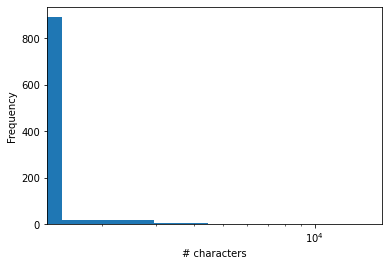

In [ ]:
import matplotlib.pyplot as plt
plt.hist(res.sumChars.to_numpy())
plt.xlabel("# characters")
plt.ylabel("Frequency")
plt.xscale("log")

In [ ]:
!curl https://2.bp.blogspot.com/-eGskF3n8_Ag/XE7F3P_de2I/AAAAAAAAHU8/WJw0un2nHqMGA8cFVtv_yFfpBVQJSYyVACK4BGAYYCw/s1600/Icon-Reddit.png > reddit.png
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("reddit.png"))
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76154  100 76154    0     0  3098k      0 --:--:-- --:--:-- --:--:-- 3098k


In [ ]:
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in posts")
plt.axis("off");

In [ ]:
text = " ".join([i for i in kdf.title.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in title")
plt.axis("off");

In [ ]:
text = " ".join([i for i in kdf.subreddit.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular subreddits")
plt.axis("off");

--------


<font size=10 color=red>Assignment question</font>

Choose a subreddit you like and build a worldcloud using Koalas. Feel free to change the mask or the colors...

--------
Answer: